## Feature Importance Analysis

two complementary approaches:

Model‑based importance — via PLS coefficients and Random Forest feature importances.

Visualization and interpretation — to understand which parts of the spectrum explain each color dimension.

In [ ]:
import pandas as pd 
import numpy as np 


In [2]:
df=pd.read_csv('../Dataset/dataset_combined.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Unnamed: 0,Sample,R,G,B,C,M,Y,H,S,I,L*,a*,b*,Date,340nm,343nm,346nm,348nm,351nm,354nm,356nm,359nm,362nm,364nm,367nm,370nm,372nm,375nm,378nm,380nm,383nm,385nm,388nm,391nm,393nm,396nm,398nm,401nm,404nm,406nm,409nm,411nm,414nm,417nm,419nm,422nm,424nm,427nm,429nm,432nm,434nm,437nm,439nm,442nm,444nm,447nm,450nm,452nm,455nm,457nm,460nm,462nm,465nm,467nm,469nm,472nm,474nm,477nm,479nm,482nm,484nm,487nm,489nm,492nm,494nm,496nm,499nm,501nm,504nm,506nm,508nm,511nm,513nm,516nm,518nm,520nm,523nm,525nm,527nm,530nm,532nm,534nm,537nm,539nm,541nm,544nm,546nm,548nm,551nm,553nm,555nm,557nm,560nm,562nm,564nm,566nm,569nm,571nm,573nm,575nm,578nm,580nm,582nm,584nm,587nm,589nm,591nm,593nm,595nm,597nm,600nm,602nm,604nm,606nm,608nm,610nm,613nm,615nm,617nm,619nm,621nm,623nm,625nm,627nm,629nm,631nm,634nm,636nm,638nm,640nm,642nm,644nm,646nm,648nm,650nm,652nm,654nm,656nm,658nm,660nm,662nm,664nm,666nm,668nm,670nm,672nm,674nm,676nm,677nm,679nm,681nm,683nm,685nm,687nm,689nm,691nm,693nm,695nm,696nm,698nm,700nm,702nm,704nm,706nm,707nm,709nm,711nm,713nm,715nm,717nm,718nm,720nm,722nm,724nm,725nm,727nm,729nm,731nm,732nm,734nm,736nm,738nm,739nm,741nm,743nm,744nm,746nm,748nm,749nm,751nm,753nm,754nm,756nm,758nm,759nm,761nm,763nm,764nm,766nm,767nm,769nm,771nm,772nm,774nm,775nm,777nm,779nm,780nm,782nm,783nm,785nm,786nm,788nm,789nm,791nm,792nm,794nm,795nm,797nm,798nm,800nm,801nm,803nm,804nm,806nm,807nm,809nm,810nm,812nm,813nm,814nm,816nm,817nm,819nm,820nm,821nm,823nm,824nm,826nm,827nm,828nm,830nm,831nm,832nm,834nm,835nm,836nm,838nm,839nm,840nm,842nm,843nm,844nm,846nm,847nm,848nm,850nm
0,1,Sliced_Cake-_D1-1,242.0,217.0,115.0,13.0,38.0,140.0,49.0,0.399,0.750,86.87,-3.96,52.84,Day1,0.004985,0.001256,0.000487,0.000377,0.000310,0.000246,0.000205,0.000174,0.000147,0.000136,0.000118,0.000110,0.000098,0.000089,0.000089,0.000093,0.000087,0.000088,0.000090,0.000093,0.000094,0.000098,0.000103,0.000115,0.000124,0.000175,0.000291,0.001142,0.011494,0.029490,0.050030,0.070559,0.093262,0.115279,0.138365,0.162632,0.186629,0.211299,0.235256,0.260126,0.290013,0.313603,0.340988,0.365282,0.387968,0.412822,0.441210,0.463405,0.490057,0.512722,0.536614,0.558122,0.580933,0.590047,0.590496,0.590917,0.593622,0.595079,0.598047,0.600515,0.603546,0.608083,0.613516,0.618521,0.625496,0.632324,0.640045,0.646583,0.649233,0.630208,0.614783,0.601858,0.597664,0.604386,0.615240,0.630450,0.647237,0.663857,0.678644,0.691140,0.703081,0.714754,0.725514,0.735951,0.744962,0.753188,0.760512,0.766975,0.773994,0.779991,0.786748,0.793857,0.800135,0.806557,0.813609,0.826781,0.838016,0.843977,0.850159,0.856601,0.862638,0.869443,0.876274,0.883241,0.890490,0.897496,0.902953,0.908718,0.914792,0.920566,0.925907,0.929905,0.933825,0.937441,0.940060,0.941777,0.939387,0.931276,0.922105,0.912274,0.900054,0.885993,0.869587,0.851823,0.832906,0.812191,0.790919,0.767766,0.744260,0.719709,0.649413,0.585099,0.524279,0.469564,0.421101,0.376863,0.337386,0.302162,0.275705,0.250211,0.225238,0.201608,0.180513,0.157951,0.138430,0.119425,0.098465,0.082150,0.059540,0.041932,0.024991,0.006261,0.001509,0.000341,0.000239,0.000182,0.000169,0.000155,0.000154,0.000148,0.000147,0.000147,0.000143,0.000147,0.000137,0.000131,0.000134,0.000136,0.000140,0.000133,0.000140,0.000135,0.000132,0.000128,0.000135,0.000130,0.000131,0.000126,0.000138,0.000128,0.000136,0.000133,0.000135,0.000142,0.000157,0.000149,0.000155,0.000161,0.000159,0.000177,0.000176,0.000177,0.000161,0.000174,0.000177,0.000185,0.000214,0.000214,0.000231,0.000231,0.000244,0.000265,0.000268,0.000296,0.000291,0.000321,0.000341,0.000327,0.000360,0.000358,0.000380,0.000412,0.000400,0.000397,0.000417,0.000408,0.000403,0.000409,0.000419,0.000415,0.000405,0.000411,0.000390,0.000399,0.000399,0.000405,0.000402,0.000400,0.000404,0.000397,0.000398,0.000387,0.000396,0.000387,0.000399,0.000393,0.000058,0.000058,0.000058,0.000058,0.000060,0.000057,0.000058,0.000059,0.000062,0.000058,0.000056,0.000056,0.000060,0.000058,0.000060,0.000058,0.000059
1,2,Sliced_Cake-_D1-2,219.0,194.0,101.0,36.0,61.0,154.0,48

In [6]:
from sklearn.preprocessing import StandardScaler

# Extract spectral features and color targets
X = df[[c for c in df.columns if "nm" in c]]
Y = df[["L*", "a*", "b*"]]

# Standardize predictors (important for regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wave_cols = X.columns

##  Partial Least Squares (PLS) 

PLS gives direct interpretability: coefficients show the sensitivity of each color parameter to changes at each wavelength

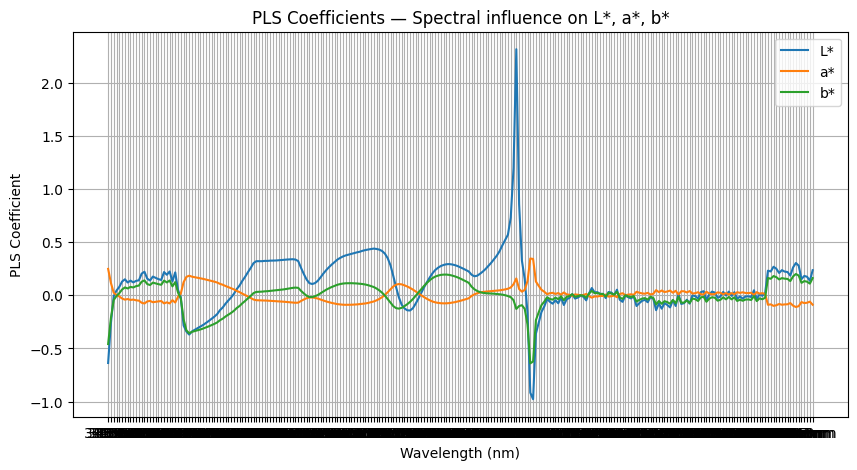

In [8]:
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
import matplotlib.pyplot as plt

# Fit model
pls = PLSRegression(n_components=5)
pls.fit(X_scaled, Y)

# Ensure coefficient matrix has expected orientation
coef = pls.coef_

# If shape is (n_targets, n_features), transpose it
if coef.shape[0] == 3 and coef.shape[1] == len(wave_cols):
    coef = coef.T  # make it (n_features, n_targets)

# Create DataFrame correctly
pls_importance = pd.DataFrame(coef, index=wave_cols, columns=["L*", "a*", "b*"])

# Plot
plt.figure(figsize=(10,5))
for col in pls_importance.columns:
    plt.plot(pls_importance.index, pls_importance[col], label=col)
plt.title("PLS Coefficients — Spectral influence on L*, a*, b*")
plt.xlabel("Wavelength (nm)")
plt.ylabel("PLS Coefficient")
plt.legend()
plt.grid(True)
plt.show()

## PLS Insights (Spectral–Color Relationships)
1️⃣ L* – Lightness (blue curve)

Prominent positive coefficients between 420 – 580 nm indicate that higher reflectance in this visible zone increases lightness (L*).
A sharp coefficient spike around ~580 nm suggests that small spectral changes in the yellow–orange region have a strong effect on perceived brightness.
Negative dips beyond 600 nm show that higher red‑region absorption slightly reduces overall lightness (darker shades).

➡️ Meaning: The visual “brightness” of the cake is controlled mainly by mid‑visible wavelengths where human vision is most sensitive — these are the regions that fade when browning darkens the surface.

2️⃣ a* – Red–Green axis (orange curve)

Coefficients stay close to 0 across most of the spectrum, meaning a* varies little with wavelength changes.
Small oscillations above 600 nm (red region) show a minor link between longer wavelengths and red coloration.

➡️ Meaning: The reddish component of the cake color remains relatively stable; spectral changes in blue and green zones hardly affect it, confirming earlier findings that a* stays almost constant through storage.

3️⃣ b* – Yellow–Blue axis (green curve)

Strong negative coefficients in 400 – 480 nm highlight that absorption in the blue region directly increases b* (yellowness).
Slight positive swings toward 520–580 nm reinforce that reflected green–yellow light contributes to visible browning.

➡️ Meaning: The blue region (≈ 420–480 nm) plays the dominant role in yellow–brown development — when the surface absorbs more blue, the color appears progressively yellower and browner.

🧠 Overall Interpretation

Color parameter	Key spectral driver	Effect on appearance	Physical implication
L*	420–580 nm (visible brightness range)	Higher absorption → darker (lower L*)	General surface darkening
a*	600–700 nm (red region)	Minor variation – slight red tinting only	Hue largely stable
b*	400–480 nm (blue)	More absorption → higher b*, stronger yellow‑brown tone	Browning pigment absorption (Maillard reaction)


🎯 Summary
The blue‑light region (~420–480 nm) is the most influential spectral band controlling visible browning.
L* correlates with global reflectance intensity, describing how bright or dark the surface appears.
a* remains least sensitive, confirming the color change is dominated by brightness (L*) and yellowness (b*).

## Random Forest regression importance

In [9]:
print(X_scaled.shape)     # something like (n_samples, 253)
print(len(wave_cols))     # should equal number of columns in X_scaled

(335, 253)
253


C:\Users\91945\AppData\Local\Temp\ipykernel_4088\3536129123.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rf.values, y=top_rf.index, palette="crest")


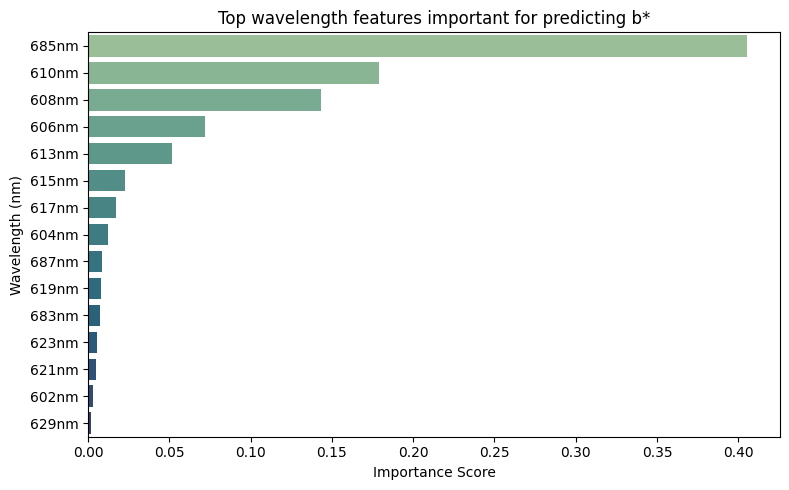


Top influential wavelengths for b* prediction:
685nm    0.405432
610nm    0.178684
608nm    0.143311
606nm    0.071957
613nm    0.051739
615nm    0.022757
617nm    0.017195
604nm    0.012300
687nm    0.008461
619nm    0.007969
683nm    0.007276
623nm    0.005319
621nm    0.004712
602nm    0.003163
629nm    0.002041
dtype: float64


In [11]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and train the random forest
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)
rf.fit(X_scaled, Y["b*"])  # Predicting yellow-brown component (b*)

# Extract feature importances
rf_imp = pd.Series(rf.feature_importances_, index=wave_cols).sort_values(ascending=False)

# Plot top 15 most important wavelengths
top_rf = rf_imp.head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=top_rf.values, y=top_rf.index, palette="crest")
plt.title("Top wavelength features important for predicting b*")
plt.xlabel("Importance Score")
plt.ylabel("Wavelength (nm)")
plt.tight_layout()
plt.show()

# Optional: print all top features with numeric scores
print("\nTop influential wavelengths for b* prediction:")
print(top_rf)

## Why we focus on b* rather than L* or a*

Most sensitive to browning	The b* parameter measures the yellow–blue axis directly — the primary direction in which food color changes during Maillard or oxidative browning.
High dynamic range	In your color data, b* showed the largest day‑to‑day increase, while L* and a* remained relatively stable. That means b* encodes the degradation signal most clearly.

## Insights from the Random Forest Feature Importance Plot
This chart shows the top spectral wavelengths (in nm) that most strongly drive the model’s predictions of b* — the yellowness/blueness component of color.

Observations:

The most dominant bands are concentrated in the red region (≈ 600–690 nm), with a standout wavelength around 685 nm.
These red‑region peaks explain a large portion of the variance in b* values — the bars drop sharply after the top two or three wavelengths.

Reflectance near 685 nm and 610 nm controls the visible shift perceived as deepening yellow‑brown tones in the product.
The importance score distribution is highly top‑heavy, meaning only a handful of spectral bands drive most of the response; the rest have low importance.

Interpretation in practical terms:

Light around 610–690 nm is absorbed or reflected differently as pigments and Maillard‑reaction products accumulate.
As these red wavelengths’ reflectance changes, perceptual yellowness (b*) increases — reflected light mixes less with blue and more with long‑wavelength red/yellow regions.

These wavelengths correspond to pigment absorption bands typical of browned or caramelized surfaces.